## **Install the Libraries**

In [40]:
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install datetime
!pip install matplotlib.pyplot
!pip install itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


## **Import the Libraries**


1.   matplotlib for visualization
1.   yfinance for importing data 
2.   numpy to work with arrays
1.   datetime to work with dates and time
1.   mplot3d to plot 3d surface
2.   chain to work with lists





In [41]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from datetime import datetime
from matplotlib import cm
from mpl_toolkits import mplot3d
from itertools import chain

## **Get all the maturities**

In [42]:
# Use the yfinance library in order to get the maturities in a list.

# Here, I have MSFT stock as an example
stock = "MSFT"
data = yf.Ticker(stock)

# Store all the maturities in a list
maturity_list = list(data.options)

## **Get the Call Options & Days to Expiry Data for each Maturity**

In [43]:
# Make an empty list to store data for calls
calls_data = []

# Make an empty list for days to expiration
days_to_expiry = []

# Make a loop to get Call Options & Days to Expiry Data for all maturities
for maturity in maturity_list:

    # Change the maturities to appropriate format
    maturity_date = datetime.strptime(maturity, '%Y-%m-%d').date()

    # Get the days to expiry by subtracting todya's date from maturity date
    days_to_expiry.append((maturity_date - datetime.now().date()).days)

    # Append the calls data list with the call options data of each maturity
    calls_data.append(data.option_chain(maturity).calls)

## **Get the IMPLIED VOLATILITY**

In [44]:
# Create 3 empty lists to store Strike prices
# Days to expiry and Implied Volatility
strike_prices = []
days_to_expiry_extended = []
implied_volatility = []

# Make a loop to get the volatiloty data corresponding to calls data
for i in range(0,len(calls_data)):

    # Append the strike prices
    strike_prices.append(calls_data[i]["strike"])

    # As all three lists must be of same length, extend the days_to_expiry
    # list to make it equal to the calls_data list
    days_to_expiry_extended.append(np.repeat(days_to_expiry[i], len(calls_data[i])))

    # Append the implied volatilities
    implied_volatility.append(calls_data[i]["impliedVolatility"])
    
# Use chain from itertools to unlist the list of lists
strike_prices = list(chain(*strike_prices))
days_to_expiry_extended = list(chain(*days_to_expiry_extended))
implied_volatility = list(chain(*implied_volatility))

## **Plot the IMPLIED VOLATILITY SURFACE**

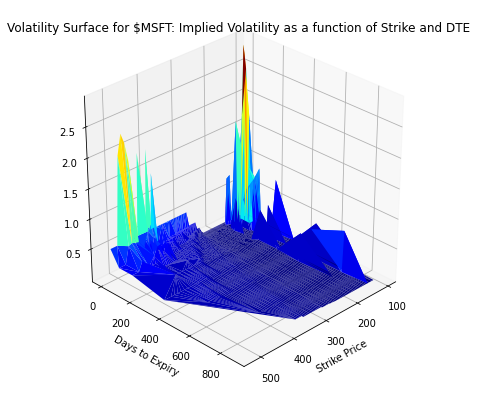

In [45]:
# Use the matplotlib.pyplot library to plot the figure
fig = plt.figure(figsize=(7,7))

# Get a 3D figure
axs = plt.axes(projection="3d")

# Set the color scheme using cm and plot the surface using plot_trisurf
axs.plot_trisurf(strike_prices, days_to_expiry_extended, implied_volatility, cmap=cm.jet)

# Set the view angle according to 
axs.view_init(30, 45)

# Mark the axes with correct labels
plt.xlabel("Strike Price")
plt.ylabel("Days to Expiry")

# Mark the title 
plt.title("Volatility Surface for $"+stock+": Implied Volatility as a function of Strike and DTE")

# Plot the figure
plt.show()